<h1> A little description of the dataset is: Glassdoor salary dataset: https://glassdoor.app.box.com/v/gender-pay-data<h1>

 First, I load the libraries need for the analysis.

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib

import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import skew
from scipy.stats import norm
from scipy.stats.stats import pearsonr

%config InlineBackend.figure_format = 'retina' #set 'png' here when working on notebook
%matplotlib inline

Import the dataset that I have downloaded with pandas library

In [55]:
import pandas as pd
dt=pd.read_csv('./data.csv')
print(dt)

                jobTitle  gender  age  perfEval          edu            dept  \
0       Graphic Designer  Female   18         5      College      Operations   
1      Software Engineer    Male   21         5      College      Management   
2    Warehouse Associate  Female   19         4          PhD  Administration   
3      Software Engineer    Male   20         5      Masters           Sales   
4       Graphic Designer    Male   26         5      Masters     Engineering   
..                   ...     ...  ...       ...          ...             ...   
995  Marketing Associate  Female   61         1  High School  Administration   
996       Data Scientist    Male   57         1      Masters           Sales   
997    Financial Analyst    Male   48         1  High School      Operations   
998    Financial Analyst    Male   65         2  High School  Administration   
999    Financial Analyst    Male   60         1          PhD           Sales   

     seniority  basePay  bonus  
0     

shape command returns the lenght of the dataset and the number of attributes

In [56]:
dt.shape

(1000, 9)

len command return the lenght of the dataset

In [57]:
len(dt)

1000

print the first 10 tuples of the dataset

In [59]:
dt.head(10)

,jobTitle,gender,age,perfEval,edu,dept,seniority,basePay,bonus
0,Graphic Designer,Female,18,5,College,Operations,2,42363,9938
1,Software Engineer,Male,21,5,College,Management,5,108476,11128
2,Warehouse Associate,Female,19,4,PhD,Administration,5,90208,9268
3,Software Engineer,Male,20,5,Masters,Sales,4,108080,10154
4,Graphic Designer,Male,26,5,Masters,Engineering,5,99464,9319
5,IT,Female,20,5,PhD,Operations,4,70890,10126
6,Graphic Designer,Female,20,5,College,Sales,4,67585,10541
7,Software Engineer,Male,18,4,PhD,Engineering,5,97523,10240
8,Graphic Designer,Female,33,5,High School,Engineering,5,112976,9836
9,Sales Associate,Female,35,5,College,Engineering,5,106524,9941


In [60]:
all_data_na = (dt.isnull().sum() / len(dt)) * 100
all_data_na 

jobTitle     0.0
gender       0.0
age          0.0
perfEval     0.0
edu          0.0
dept         0.0
seniority    0.0
basePay      0.0
bonus        0.0
dtype: float64

 In above we can see that we do not have attribute that contains an error

In [61]:
# take the numerical features
numeric_feats = dt.dtypes[dt.dtypes != "object"].index

# compute the skewness but only for non missing variables (we already imputed them but just in case ...)
skewed_feats = dt[numeric_feats].apply(lambda x: skew(x.dropna()))

skewness = pd.DataFrame({"Variable":skewed_feats.index, "Skewness":skewed_feats.values})
# select the variables with a skewness above a certain threshold

Text(0.5, 1.0, '')

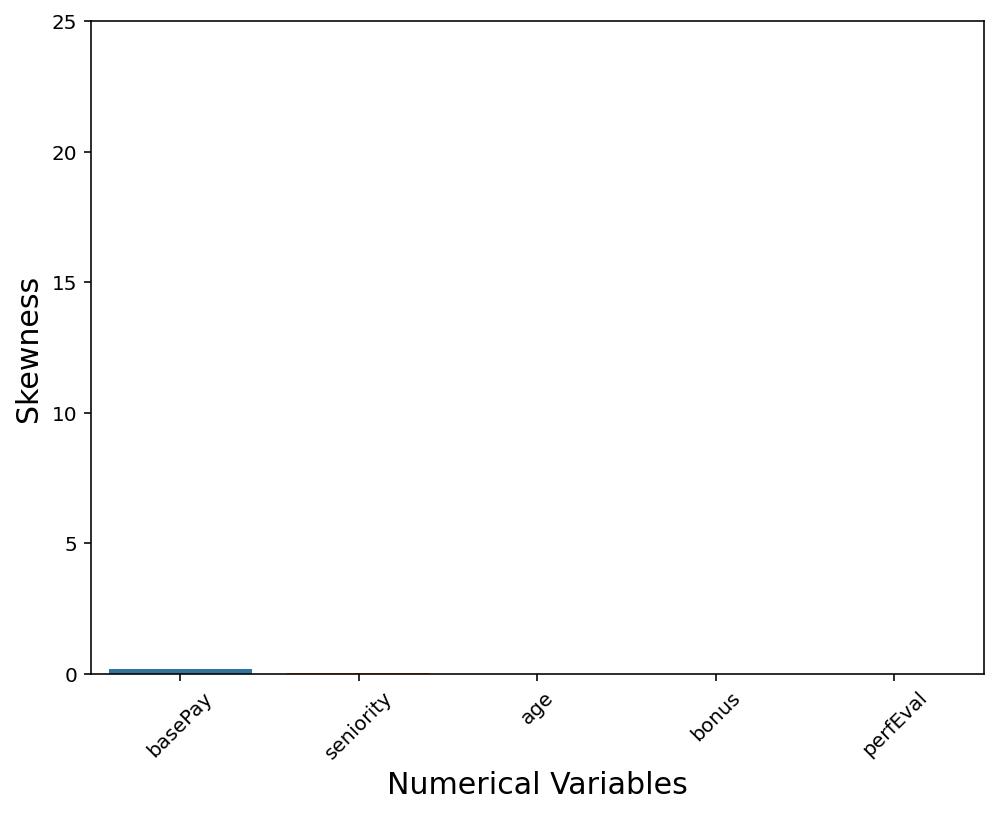

In [62]:
skewness = skewness.sort_values('Skewness', ascending=[0])

f, ax = plt.subplots(figsize=(8,6))
plt.xticks(rotation='45')
sns.barplot(x=skewness['Variable'], y=skewness['Skewness'])
plt.ylim(0,25)
plt.xlabel('Numerical Variables', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('', fontsize=15)

In [63]:
# since it is not obvious if the base pay has a skew higher than the treshold, I will verify it
skewed_feats = skewed_feats[skewed_feats > 0.2]
dt[skewed_feats.index] = np.log1p(dt[skewed_feats.index])
skewed_feats

Series([], dtype: float64)

Since there is no feature with skew higher than the threshold, I will not apply the logarithmic transformation

<h2>Correlation Analysis<h2>

I perform some correlation analysis.

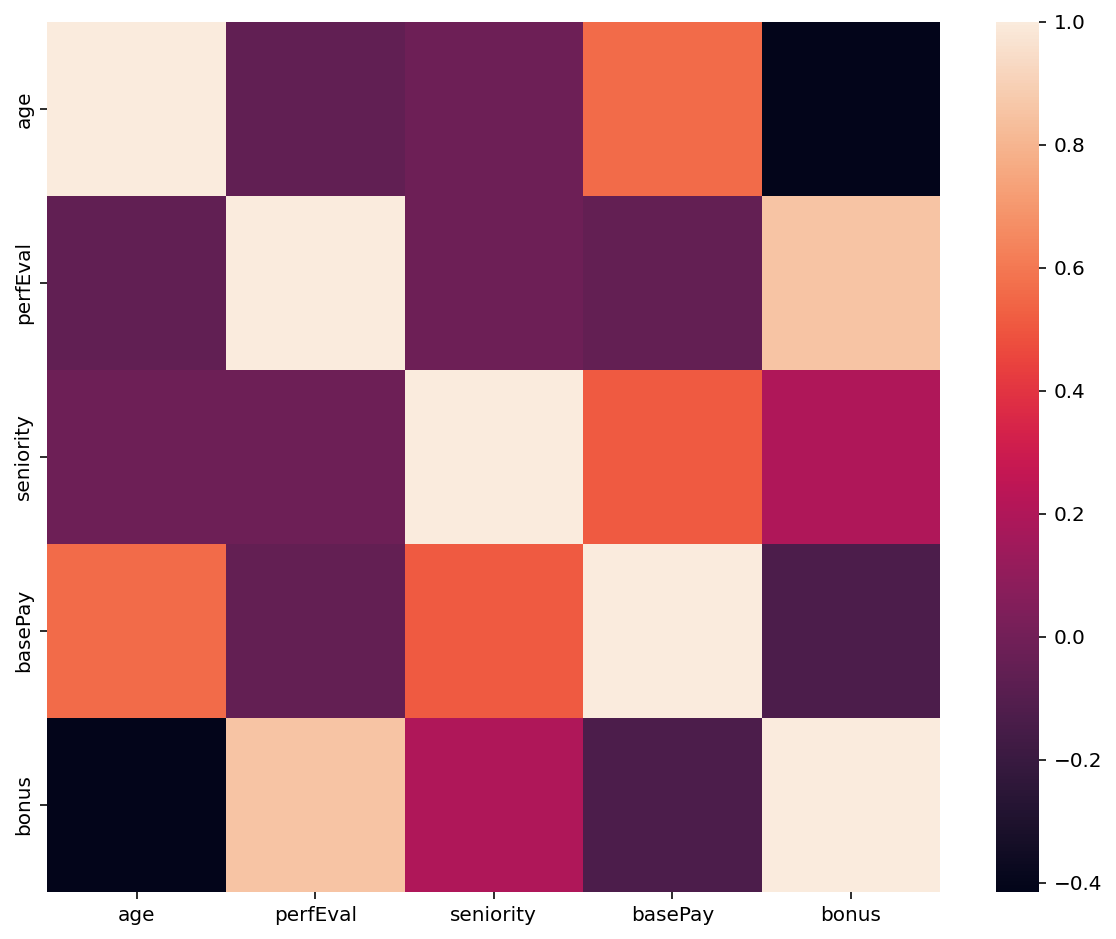

In [64]:
corrmat = dt.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmat, vmax=1);

Here we can see that the bonus and age have a strong negative correlation, that is to say, the lower the bonus, the lower the age, but the bonus and the evaluation performance have a strong positive correlation, that is, the higher the bonus, the greater the evaluation performance.

<h2>Transform categorical variables into numerical<h2>

In [65]:
# get categorical variables
dt.dtypes[dt.dtypes == "object"].index

Index(['jobTitle', 'gender', 'edu', 'dept'], dtype='object')

In [66]:
dt = pd.get_dummies(dt, columns=['jobTitle', 'gender', 'edu', 'dept'], drop_first=True)
dt

,age,perfEval,seniority,basePay,bonus,jobTitle_Driver,jobTitle_Financial Analyst,jobTitle_Graphic Designer,jobTitle_IT,jobTitle_Manager,...,jobTitle_Software Engineer,jobTitle_Warehouse Associate,gender_Male,edu_High School,edu_Masters,edu_PhD,dept_Engineering,dept_Management,dept_Operations,dept_Sales
0,18,5,2,42363,9938,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,21,5,5,108476,11128,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,19,4,5,90208,9268,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,20,5,4,108080,10154,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4,26,5,5,99464,9319,0,0,1,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,61,1,1,62644,3270,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
996,57,1,2,108977,3567,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
997,48,1,1,92347,2724,0,1,0,0,0,...,0,0,1,1,0,0,0,0,1,0
998,65,2,1,97376,2225,0,1,0,0,0,...,0,0,1,1,0,0,0,0,0,0


# Create train and test sets

In [67]:
# split the data into inputs and targets 

targets = dt['bonus']
targets

0       9938
1      11128
2       9268
3      10154
4       9319
       ...  
995     3270
996     3567
997     2724
998     2225
999     2244
Name: bonus, Length: 1000, dtype: int64

In [68]:
inputs=dt.drop(['bonus'],axis=1)
inputs

,age,perfEval,seniority,basePay,jobTitle_Driver,jobTitle_Financial Analyst,jobTitle_Graphic Designer,jobTitle_IT,jobTitle_Manager,jobTitle_Marketing Associate,...,jobTitle_Software Engineer,jobTitle_Warehouse Associate,gender_Male,edu_High School,edu_Masters,edu_PhD,dept_Engineering,dept_Management,dept_Operations,dept_Sales
0,18,5,2,42363,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,21,5,5,108476,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0
2,19,4,5,90208,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,20,5,4,108080,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,1
4,26,5,5,99464,0,0,1,0,0,0,...,0,0,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,61,1,1,62644,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
996,57,1,2,108977,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
997,48,1,1,92347,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
998,65,2,1,97376,0,1,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0


In [69]:
from sklearn.preprocessing import StandardScaler
scaled_inputs = StandardScaler().fit_transform(inputs)
scaled_inputs

array([[-1.6372817 ,  1.37924092, -0.6963913 , ..., -0.49687301,
         1.93956303, -0.51091491],
       [-1.42731098,  1.37924092,  1.45517812, ...,  2.01258666,
        -0.51558005, -0.51091491],
       [-1.56729146,  0.67662201,  1.45517812, ..., -0.49687301,
        -0.51558005, -0.51091491],
       ...,
       [ 0.46242552, -1.43123471, -1.41358111, ..., -0.49687301,
         1.93956303, -0.51091491],
       [ 1.65225961, -0.72861581, -1.41358111, ..., -0.49687301,
        -0.51558005, -0.51091491],
       [ 1.30230841, -1.43123471, -0.6963913 , ..., -0.49687301,
        -0.51558005,  1.95727307]])

In [70]:
# create test and train sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_inputs,targets,test_size=0.2, random_state=365)

# Create models

In [87]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

### Adaboost Model

In [84]:
random_seed = 1234
adaboost_model = AdaBoostRegressor(DecisionTreeRegressor(max_depth=2), n_estimators=300, random_state=random_seed)
adaboost_model.fit(x_train, y_train.ravel())

y_predict = adaboost_model.predict(x_test)
y_test-y_predict

579    -323.784530
206     105.834061
821     286.117857
252     -42.925000
733   -1378.817881
          ...     
695   -1284.446352
443    -192.462908
820     745.546763
521      33.240506
884   -1523.784884
Name: bonus, Length: 200, dtype: float64

In [86]:
adaboost_model.score(x_train, y_train.ravel())*100

88.43653050794609

----

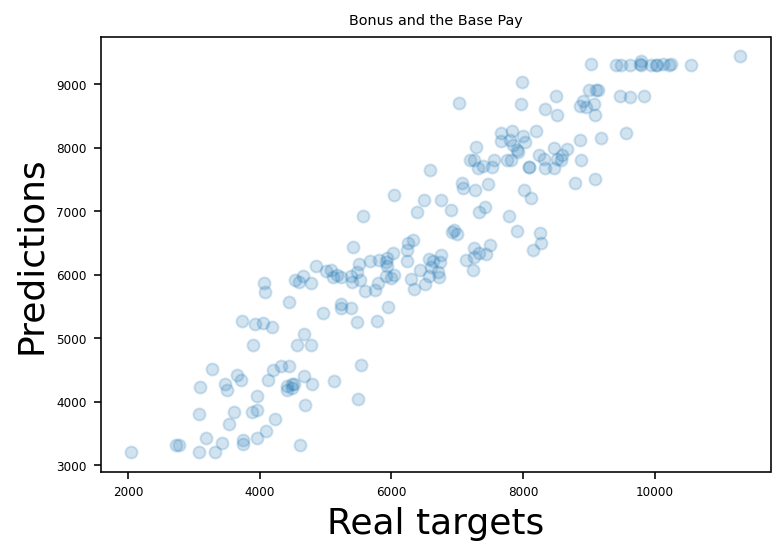

In [83]:
plt.scatter(y_test, y_predict,  alpha=0.2)

plt.xlabel("Real targets",size=18)
plt.ylabel("Predictions",size=18)

plt.title("Bonus and the Base Pay")

plt.show()

..

# Linear Regression model

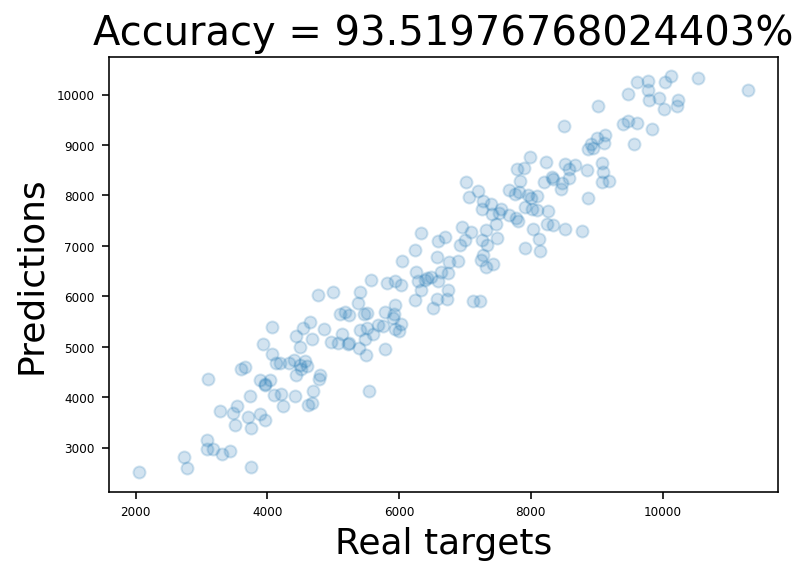

In [95]:
regr = linear_model.LinearRegression()

regr.fit(x_train, y_train)

# model output for the input data
y_hat = regr.predict(x_test)

plt.scatter(y_test, y_hat,  alpha=0.2)

plt.xlabel("Real targets",size=18)
plt.ylabel("Predictions",size=18)

plt.title(f'Accuracy = {regr.score(x_train, y_train)*100}%',size=20)

plt.show()

....

In [99]:
y_test-y_hat

579   -378.508465
206   -136.131230
821   -153.156133
252   -268.906982
733   -829.107559
          ...    
695   -503.345834
443    113.792688
820    559.240086
521    317.658244
884   -284.589266
Name: bonus, Length: 200, dtype: float64

### Model Evaluation Linear Regression with crossvalidation

In [90]:
model = linear_model.LinearRegression()
scores = cross_val_score(model, x_train, y_train, cv=10)

print("Mean score of %0.2f with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Mean score of 0.93 with a standard deviation of 0.02


There isn't

# KNN model

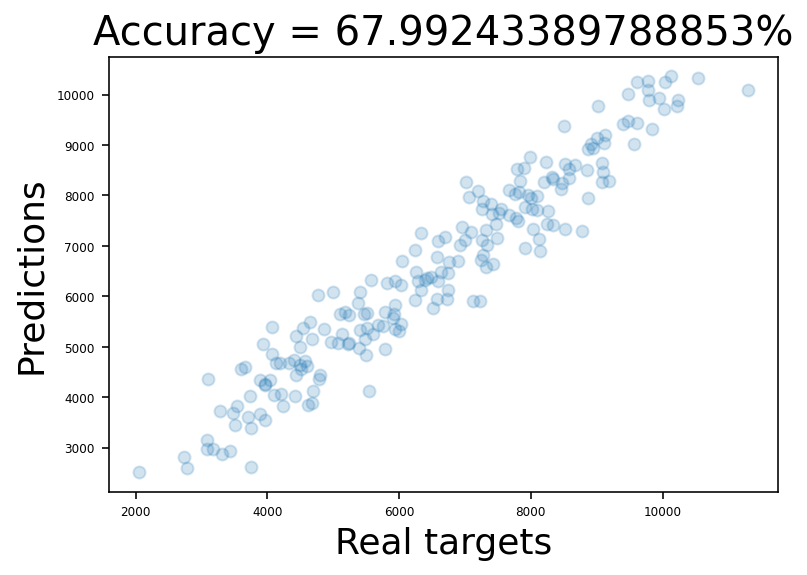

In [98]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(5, weights='uniform')

knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

plt.scatter(y_test, y_hat,  alpha=0.2)

plt.xlabel("Real targets",size=18)
plt.ylabel("Predictions",size=18)

plt.title(f'Accuracy = {knn.score(x_train, y_train)*100}%',size=20)

plt.show()

In [100]:
y_test-y_pred

579    -814.0
206    2457.2
821   -1997.8
252    1502.2
733   -1795.8
        ...  
695    -292.2
443    -467.8
820    -218.2
521     683.6
884   -2658.4
Name: bonus, Length: 200, dtype: float64